In [2]:
___Author___='LumberJack Jyss'

In [3]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [4]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
print('Librairies importées')

Importation des librairies...


Using TensorFlow backend.


Librairies importées


In [6]:

start = pd.to_datetime('2014-01-28')
end = pd.to_datetime('2019-05-21')

df = web.DataReader('BIDU','yahoo',start,end)

delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')


#dataframe = dataframe.iloc[:,1:]
df.reset_index(inplace=True)
df.head()

Période d'étude :  1338
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1070  jours 
Bloc 2 : 268  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,166.550003,162.500000,163.289993,164.240005,4873500,164.240005
1,2014-01-29,163.389999,157.399994,163.289993,158.100006,4315800,158.100006
2,2014-01-30,162.600006,158.300003,161.479996,160.809998,3334800,160.809998
3,2014-01-31,159.949997,155.369995,159.740005,156.500000,3945800,156.500000
4,2014-02-03,157.929993,148.600006,156.259995,150.520004,5027500,150.520004


In [7]:
df.shape

(1338, 7)

In [8]:
data_train = df.iloc[:bloc1,:6]
data_train.head()

,Date,High,Low,Open,Close,Volume
0,2014-01-28,166.550003,162.500000,163.289993,164.240005,4873500
1,2014-01-29,163.389999,157.399994,163.289993,158.100006,4315800
2,2014-01-30,162.600006,158.300003,161.479996,160.809998,3334800
3,2014-01-31,159.949997,155.369995,159.740005,156.500000,3945800
4,2014-02-03,157.929993,148.600006,156.259995,150.520004,5027500


In [9]:
df.shape

(1338, 7)

In [10]:
trainset = data_train.iloc[:, 3:4].values
trainset

array([[163.28999329],
       [163.28999329],
       [161.47999573],
       ...,
       [233.82000732],
       [229.19999695],
       [232.83000183]])

In [11]:
sc = MinMaxScaler(feature_range = (0,1))
trainData_scaled = sc.fit_transform(trainset)

In [12]:
x_train = []
y_train = []

In [13]:
for i in range(60, len(data_train)): #60 is the memory size, nb of rows of training data
    x_train.append(trainData_scaled[i-60:i, 0]) # adds data for the last 60 rows
    y_train.append(trainData_scaled[i,0]) # adds the prices that the model is trying to predict

# Convert to tensors
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train.shape

(1010, 60)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # adds a 3rd dimension to the tensor
#                     array , new size -->(x, y, z)

In [16]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

W0523 03:04:09.898895 4815795648 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0523 03:04:09.913946 4815795648 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0523 03:04:09.916044 4815795648 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0523 03:04:10.163503 4815795648 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorfl

In [17]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

W0523 03:04:10.781448 4815795648 deprecation.py:323] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0523 03:04:12.446218 4815795648 deprecation_wrapper.py:119] From /Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2000
1010/1010 [==============================] - 6s 6ms/step - loss: 0.0622
Epoch 2/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0108
Epoch 3/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0078
Epoch 4/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0071
Epoch 5/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0072
Epoch 6/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0068
Epoch 7/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0063
Epoch 8/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0066
Epoch 9/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0060
Epoch 10/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0059
Epoch 11/2000
1010/1010 [==============================] - 4s 4ms/step - loss: 0.0054
Epoch 12/2000
1010/1010 [==============================] - 4s 4

In [41]:
model.save("BIDU_RNN.hd5f")

In [42]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,166.550003,162.500000,163.289993,164.240005,4873500,164.240005
1,2014-01-29,163.389999,157.399994,163.289993,158.100006,4315800,158.100006
2,2014-01-30,162.600006,158.300003,161.479996,160.809998,3334800,160.809998
3,2014-01-31,159.949997,155.369995,159.740005,156.500000,3945800,156.500000
4,2014-02-03,157.929993,148.600006,156.259995,150.520004,5027500,150.520004


In [43]:
bloc1

1070

In [44]:
data_test= df.iloc[bloc1:,:6] # Import Test Data

In [45]:
data_train.tail()

,Date,High,Low,Open,Close,Volume
1065,2018-04-20,235.690002,230.210007,234.919998,232.500000,2280200
1066,2018-04-23,235.050003,230.139999,232.520004,231.419998,1534400
1067,2018-04-24,238.360001,228.500000,233.820007,231.410004,2220100
1068,2018-04-25,231.460007,222.500000,229.199997,231.410004,2256400
1069,2018-04-26,239.399994,232.600006,232.830002,238.690002,3899600


In [46]:
data_test.head()

,Date,High,Low,Open,Close,Volume
1070,2018-04-27,257.299988,245.630005,253.949997,251.929993,8015600
1071,2018-04-30,255.000000,244.399994,253.690002,250.899994,4269500
1072,2018-05-01,254.080002,246.009995,247.240005,252.130005,2471100
1073,2018-05-02,252.740005,246.800003,250.919998,249.800003,3058000
1074,2018-05-03,254.539993,245.740005,249.000000,252.460007,2728200


In [47]:
actual_stock_price = data_test.iloc[:, 3:4].values # Get the Open Prices

In [48]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis=0) 
# combines the train and test data (axis=0 labels by index)

In [49]:
data_total[-5:]

1333    151.729996
1334    153.309998
1335    130.529999
1336    123.230003
1337    119.220001
Name: Open, dtype: float64

In [50]:
inputs = data_total[len(data_total) - len(data_test)-60:].values #removes the answers
print(len(data_total))
print(len(data_test))

inputs = inputs.reshape(-1, 1) #Converts the row of values into a column vector
inputs = sc.transform(inputs) # Feature Scaling (0-1)
inputs.shape

1338
268


(328, 1)

In [51]:
# Prepare Testing Inputs
x_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0]) #Prepares the 60 data memory input

x_test = np.array(x_test) #Turn the inputs into an array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Add a 3rd dimension

In [52]:
# Use the RNN to make the predeictions 
raw_prediction = model.predict(x_test)

In [53]:
price_prediction = sc.inverse_transform(raw_prediction) # Undoes the normalization into usable values
price_prediction [0:5]

array([[230.6616 ],
       [239.17465],
       [240.11612],
       [241.31026],
       [245.35002]], dtype=float32)

In [96]:
sc2 = MinMaxScaler(feature_range = (-1,1))

raw_prediction = sc2.fit_transform(raw_prediction)

Suggestion = []
percentChange = []

for d in range(1,len(raw_prediction)):
    percentChange.append(float((raw_prediction[d]-raw_prediction[d-1])))
    
for n in percentChange:
    #print(n)
    if n < -0.02:
        Suggestion.append(1) # Buy after a threshhold of increase
    elif n > 0.02:
        Suggestion.append(-1) # Sell when there is a drop
    else:
        Suggestion.append(0)
#print(Buy)

In [97]:
PurchaseHistory_short=[]
BuyPoints_short =  [[], []]
SellPoints_short = [[], []]
sold_short = False
for i in range(0, len(actual_stock_price)-1):
    if Suggestion[i] == -1 and not sold_short:
        PurchaseHistory_short.append(["Sell: ", actual_stock_price[i], i])
        SellPoints_short[0].append(actual_stock_price[i])
        SellPoints_short[1].append(i)
        sold_short = True
    if Suggestion[i] == 1 and sold_short:
        PurchaseHistory_short.append(["Buy:", actual_stock_price[i], i])
        BuyPoints_short[0].append(actual_stock_price[i])
        BuyPoints_short[1].append(i)        
        sold_short = False
if len(PurchaseHistory_short)%2 != 0:
    PurchaseHistory_short.pop()
    SellPoints_short[0].pop()
    SellPoints_short[1].pop() 
#PurchaseHistory

In [98]:
Profit_short = 0
for purchase in range(1, len(PurchaseHistory_short)+1, 2):
    MoneyMade_short = (float(-PurchaseHistory_short[purchase][1] + float(PurchaseHistory_short[purchase-1][1])))
    Profit_short += MoneyMade_short

print('$'+ str(round(Profit_short, 2)))

$30.45


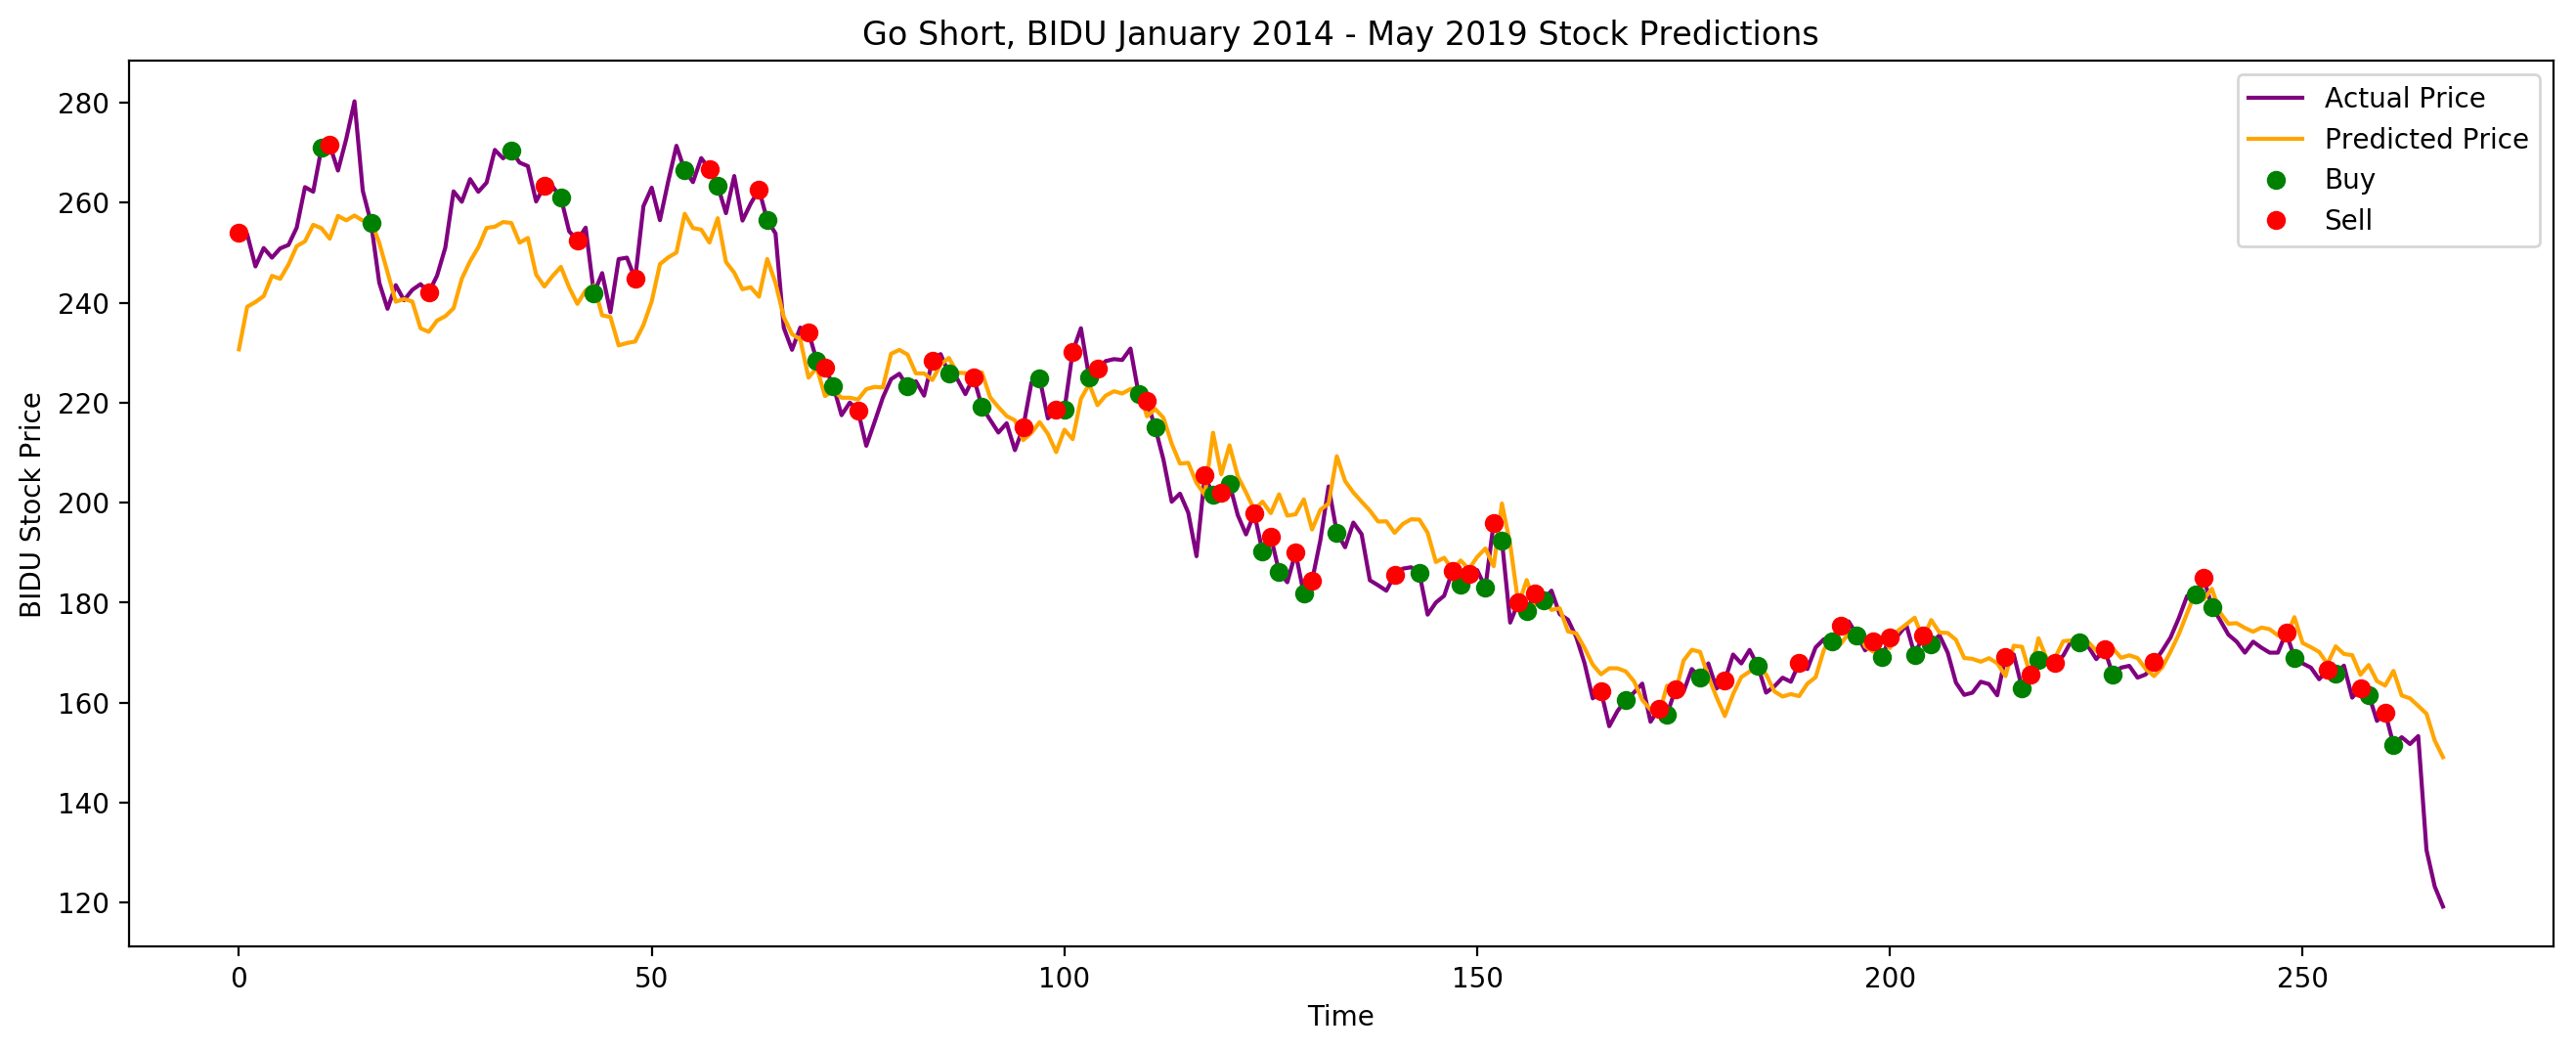

In [99]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_short[1], BuyPoints_short[0], "go",label='Buy')
plt.plot(SellPoints_short[1], SellPoints_short[0], "ro",label='Sell')

plt.title("Go Short, BIDU January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('BIDU Stock Price')
plt.legend()
plt.show()

In [93]:
sc2 = MinMaxScaler(feature_range = (-1,1))

raw_prediction = sc2.fit_transform(raw_prediction)

Suggestion = []
percentChange = []

for d in range(1,len(raw_prediction)):
    percentChange.append(float((raw_prediction[d]-raw_prediction[d-1])))
    
for n in percentChange:
    #print(n)
    if n > 0.02:
        Suggestion.append(-1) # Sell after a threshhold of increase
    elif n < 0.02:
        Suggestion.append(1) # Buy when there is a drop
    else:
        Suggestion.append(0)
#print(Buy)

In [94]:
PurchaseHistory_long=[]
BuyPoints_long =  [[], []]
SellPoints_long = [[], []]
bought_long = False
for i in range(0, len(actual_stock_price)-1):
    if Suggestion[i] == 1 and not bought_long:
        PurchaseHistory_long.append(["Buy: ", actual_stock_price[i], i])
        BuyPoints_long[0].append(actual_stock_price[i])
        BuyPoints_long[1].append(i)
        bought_long = True
    if Suggestion[i] == -1 and bought_long:
        PurchaseHistory_long.append(["Sell:", actual_stock_price[i], i])
        SellPoints_long[0].append(actual_stock_price[i])
        SellPoints_long[1].append(i)        
        bought_long = False
if len(PurchaseHistory_long)%2 != 0:
    PurchaseHistory_long.pop()
    BuyPoints_long[0].pop()
    BuyPoints_long[1].pop() 
#PurchaseHistory

In [95]:
purchase = 0
Profit_long = 0
for purchase in range(1, len(PurchaseHistory_long)+1, 2):
    MoneyMade_long = float(PurchaseHistory_long[purchase][1] - float(PurchaseHistory_long[purchase-1][1]))
    Profit_long += MoneyMade_long

print('$'+ str(round(Profit_long, 2)))

$-69.88


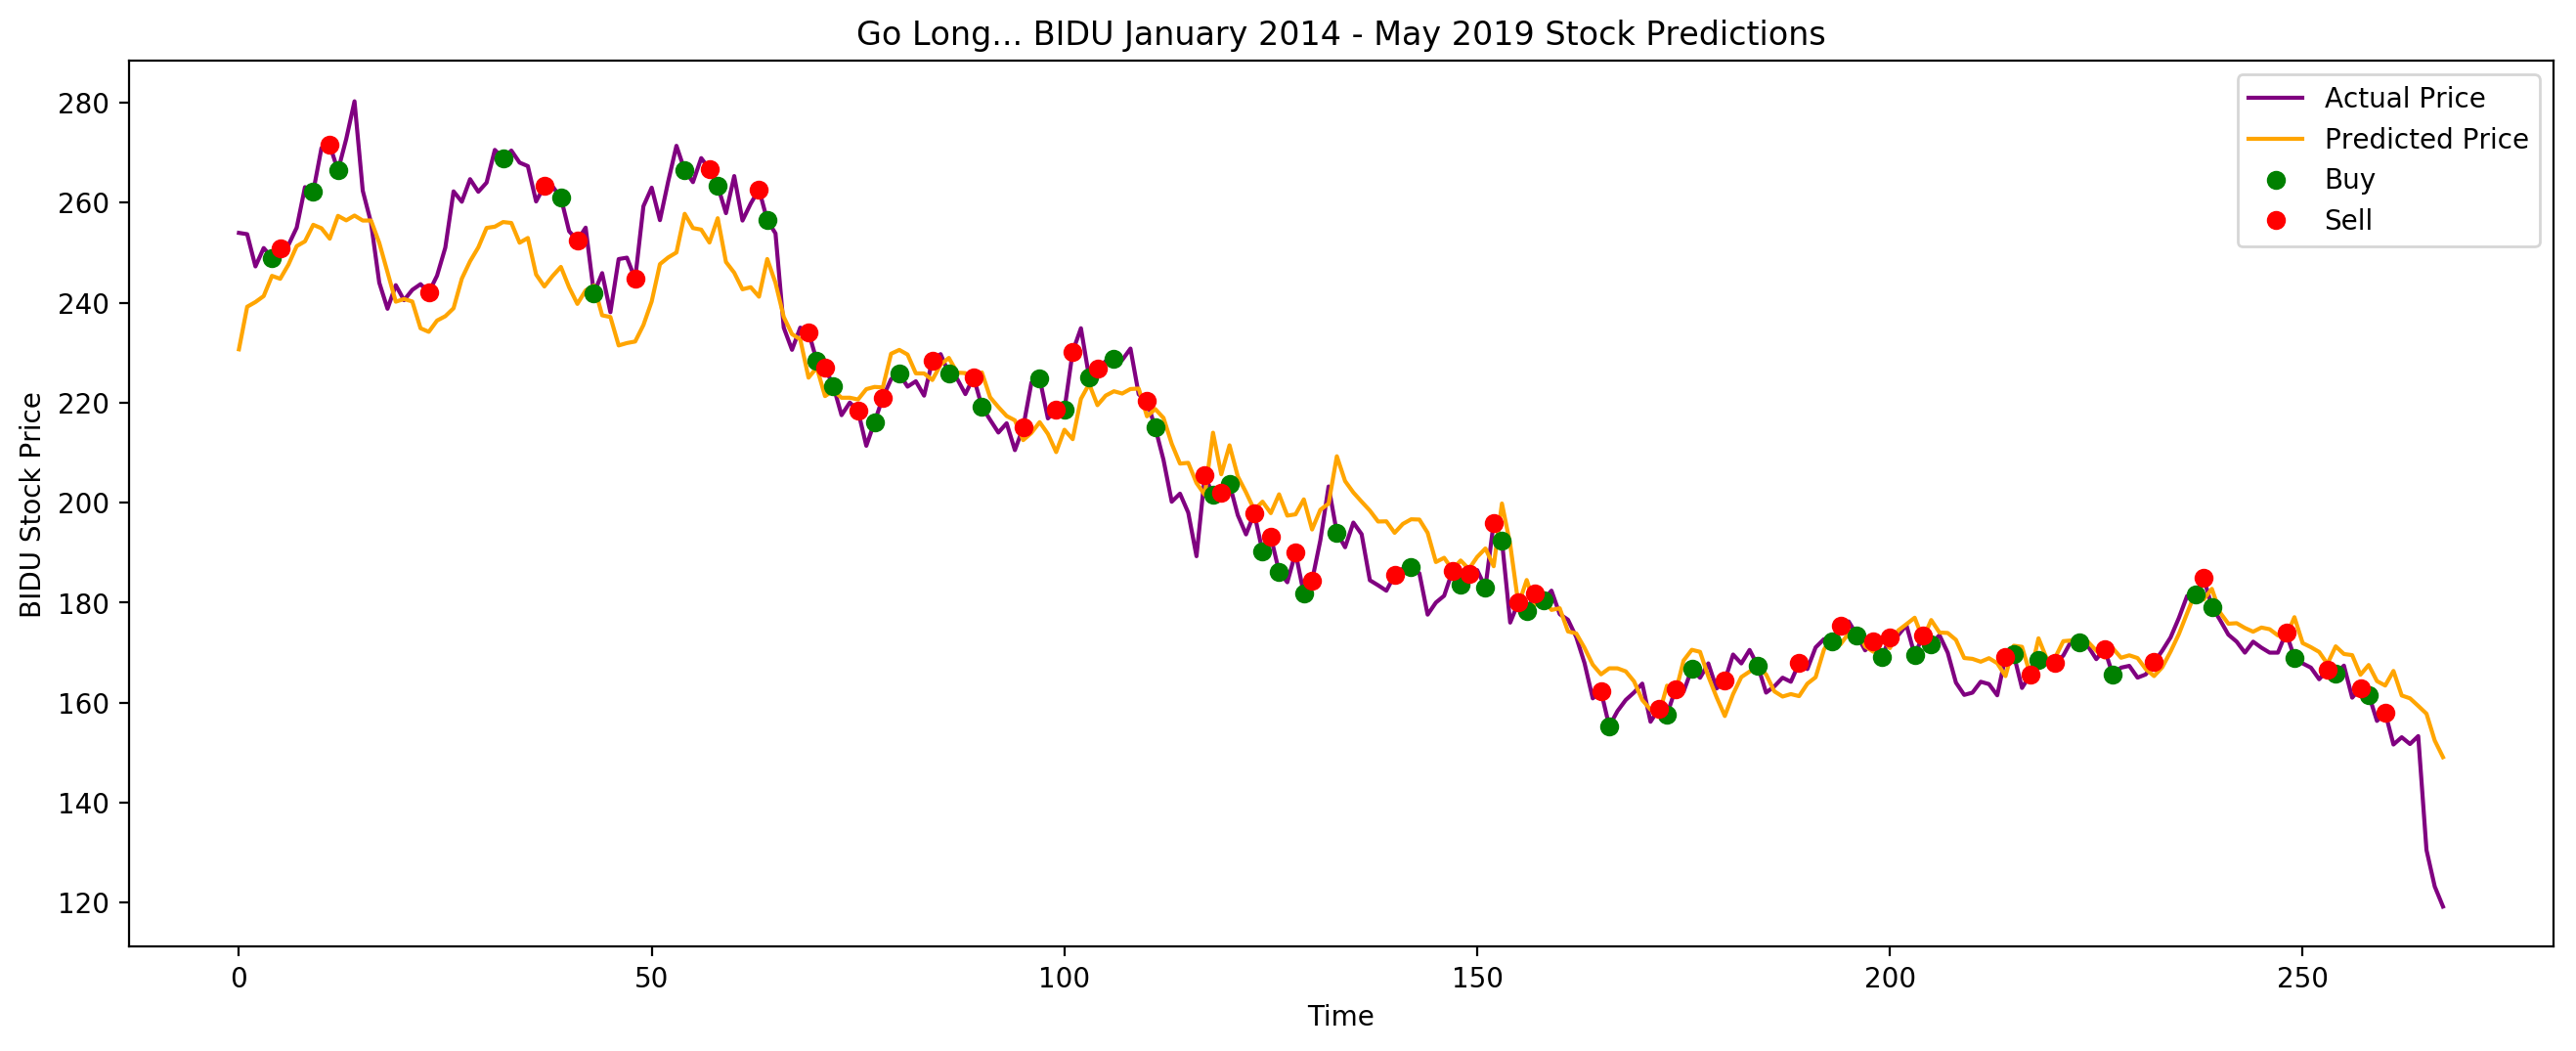

In [92]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_long[1], BuyPoints_long[0], "go",label='Buy')
plt.plot(SellPoints_long[1], SellPoints_long[0], "ro",label='Sell')
plt.title("Go Long... BIDU January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('BIDU Stock Price')
plt.legend()
plt.show()

In [73]:
print('Long CumProfit :','$'+ str(round(Profit_long+Profit_short, 2)))

Long CumProfit : $-56.42


In [74]:
MinimumRequiredCapital_long = max(BuyPoints_long[0])
MinimumRequiredCapital_short = max(BuyPoints_short[0])
ROI_long = Profit_long / MinimumRequiredCapital_long * 100
ROI_short = Profit_short / MinimumRequiredCapital_short * 100
print('Summary BIDU')
print('Total period : From ',start,' to ',end)
print('Training on ',bloc1,' days')
print('Testing on ',bloc2,' days')
print('Minimum Required Capital long :',round(MinimumRequiredCapital_long[0]),'$')
print('Minimum Required Capital short :',round(MinimumRequiredCapital_short[0]),'$')
print('Number of long :',len(BuyPoints_long[1]))
print('Number of short :',len(BuyPoints_short[1]))
print('Short CumProfit :''$'+ str(round(Profit_short, 2)))
print('Long CumProfit :''$'+ str(round(Profit_long, 2)))
print('Cumulative Profit :','$'+ str(round(Profit_long+Profit_short, 2)))
print("Return on Long Investment:", round(float(ROI_long), 2),"%")
print("Return on Short Investment:", round(float(ROI_short), 2),"%")

Summary BIDU
Total period : From  2014-01-28 00:00:00  to  2019-05-21 00:00:00
Training on  1070  days
Testing on  268  days
Minimum Required Capital long : 280.0 $
Minimum Required Capital short : 280.0 $
Number of long : 55
Number of short : 62
Short CumProfit :$22.96
Long CumProfit :$-79.38
Cumulative Profit : $-56.42
Return on Long Investment: -28.32 %
Return on Short Investment: 8.19 %


In [75]:
df.shape

(1338, 7)